# Project: Communicate Data Findings
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#source">Data Source</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <ul>
        <li><a href="#assessingsum">Assessing Summary</a></li>            
    </ul>    
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Visualization</a></li>
    <ul>
        <li><a href="#uni">Univariate Exploration</a></li>
        <li><a href="#bi">Bivariate Exploration</a></li>
        <li><a href="#multi">Multivariate Exploration</a></li> 
    </ul> 
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='sources'></a>
## Data Source


>1. **Name:** loan data (prosperLoanData.csv)</li>
><ul>   
>    <li><b>Source:</b>Udacity</li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>


### Import all packages and set plots to be embedded inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

%matplotlib inline

### DATA ASSESSING

In [1]:
#read loan data and look at random samples
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.sample(10)

NameError: name 'pd' is not defined

In [3]:
# Explore the dataframe size
df_loan.shape

(113937, 81)

In [4]:
#show the info of the dataframe
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

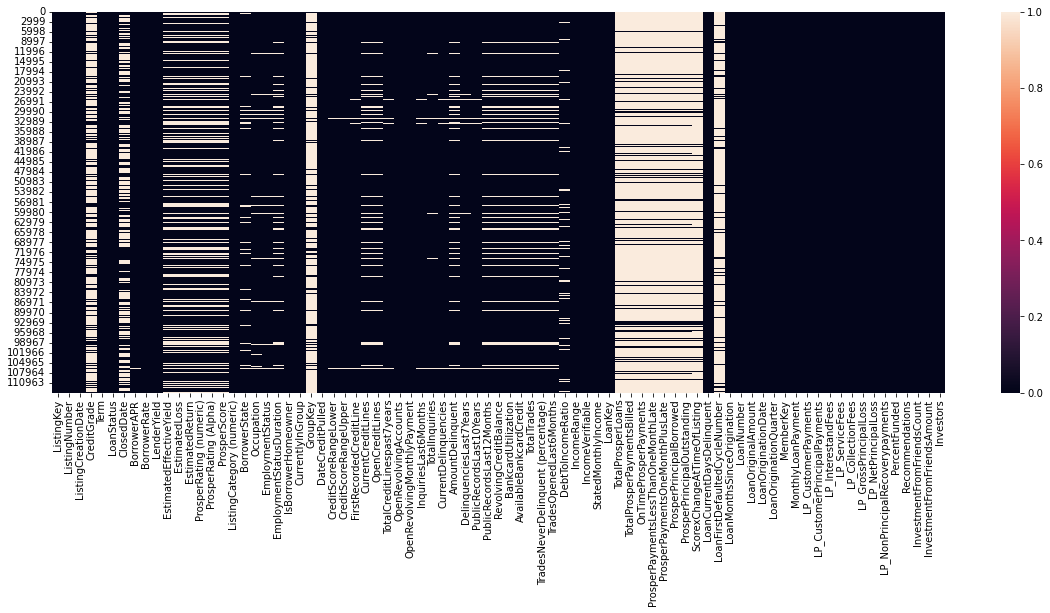

In [5]:
#looking for the missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_loan.isnull(), vmin=0, vmax = 1)


- As we can see there a lot of missing values in the dataset which we will deal with later on

### Only a select number of columns will be analyzed

In [6]:
#making a sub dataframe of the columns to be analysed

interest_area=['Term','LoanStatus','BorrowerRate','EstimatedReturn','ProsperRating (Alpha)',
               'ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner',
              'StatedMonthlyIncome','TotalProsperLoans','LoanOriginalAmount','LoanOriginationDate','Investors']

loan_sub=df_loan[interest_area]

In [7]:
# explore a sample of the sub dataframe
loan_sub.sample(10)

,Term,LoanStatus,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Investors
73116,36,Current,0.1050,0.06462,A,1,Employed,True,4166.666667,1.0,10000,2013-11-13 00:00:00,1
107377,60,Current,0.1765,0.08022,C,1,Employed,True,5416.666667,NaN,15000,2013-12-24 00:00:00,1
55631,36,Completed,0.0930,0.06800,AA,1,Full-time,True,7083.333333,2.0,8000,2010-03-24 00:00:00,300
46630,36,Completed,0.0800,0.05450,AA,2,Employed,False,4333.333333,NaN,8000,2010-12-21 00:00:00,226
83120,36,Current,0.2099,0.11030,C,7,Employed,True,5416.666667,NaN,2500,2012-07-31 00:00:00,28
55108,36,Completed,0.1550,NaN,NaN,1,Full-time,False,2916.666667,NaN,7000,2008-03-12 00:00:00,109
37793,36,Current,0.2469,0.09900,D,1,Employed,False,12916.666667,NaN,3500,2013-11-08 00:00:00,1
94262,60,Current,0.1419,0.08360,B,1,Employed,True,4916.666667,NaN,8600,2013-06-03 00:00:00,155
47761,36,Completed,0.1475,NaN,NaN,0,NaN,False,1791.666667,NaN,2750,2006-04-12 00:00:00,23
90638,36,Chargedoff,0.3177,0.12460,HR,1,Employed,False,3750.000000,NaN,4000,2011-12-05 00:00:00,79


In [8]:
loan_sub.shape

(113937, 13)

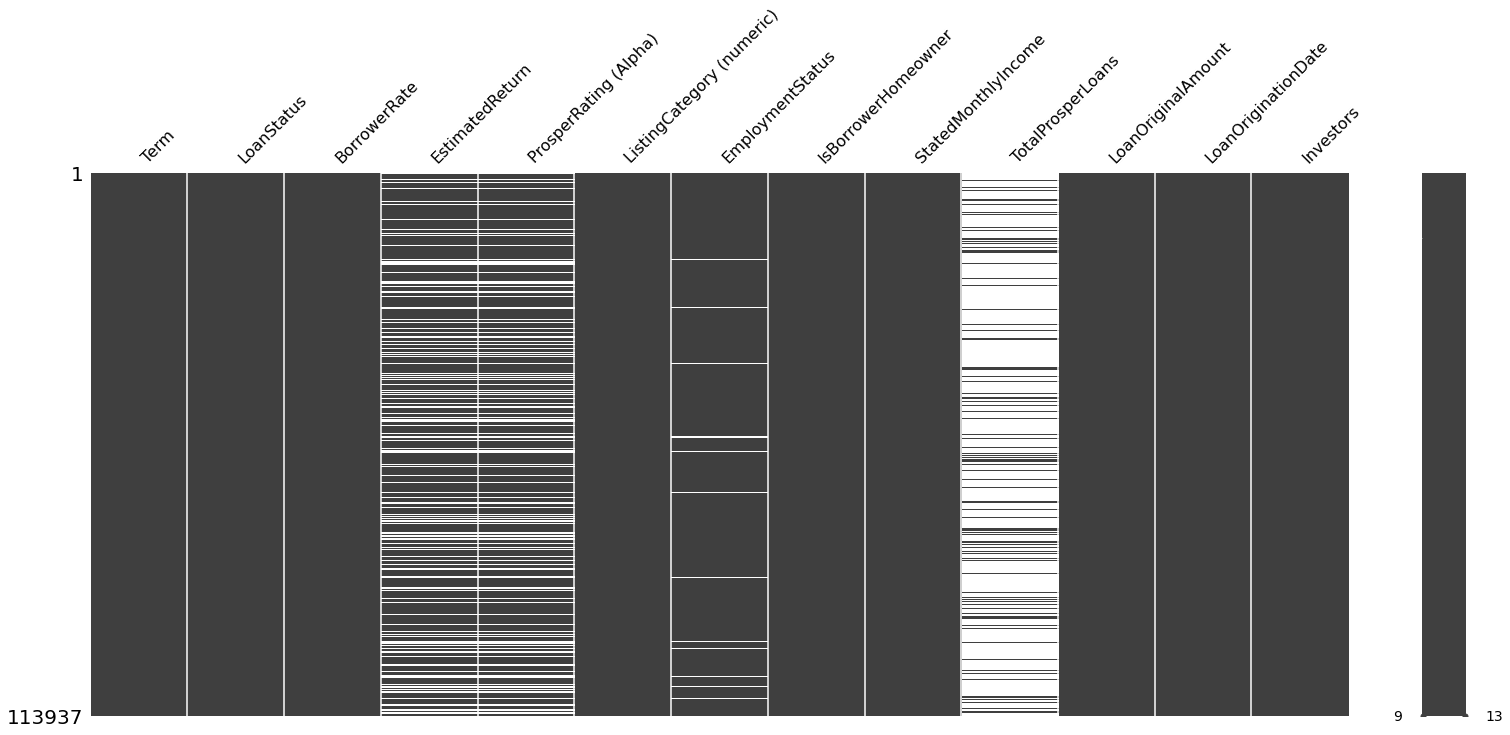

In [9]:
#plot the missing data of the dataset
ms.matrix(loan_sub);

In [10]:
#checking for duplicates

loan_sub.duplicated().sum()

887

In [11]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   EstimatedReturn            84853 non-null   float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   StatedMonthlyIncome        113937 non-null  float64
 9   TotalProsperLoans          22085 non-null   float64
 10  LoanOriginalAmount         113937 non-null  int64  
 11  LoanOriginationDate        113937 non-null  object 
 12  Investors                  113937 non-null  int64  
dtypes: bool(1), float64(4), int64

<a id='assessingsum'></a>
### Assessing Summary

#### Quality
- there are missing values in the ProsperRating (Alpha), TotalProsperLoans, occupation and EstimatedReturn columns
- the column LoanOriginationDate is not datetime type
- totalProsperLoans column has NAN values which is odd
- the colulumns: employment status,loanstatus, term and ProsperRating (Alpha) should be a categorical data type

<a id='cleaning'></a>
## Data Cleaning

##### Define

>since the estimated return ad prosperrating came into effect after july 2009 they both have same number of missing values,lets drop these values as they precede july 2009


##### Code

In [12]:
# dropping the Nulls from 'ProsperRating (Alpha)', 'EstimatedReturn'
loan_sub = loan_sub.dropna(subset=['ProsperRating (Alpha)','EstimatedReturn']).reset_index()

##### Test

In [13]:
loan_sub.isnull().sum()

index                            0
Term                             0
LoanStatus                       0
BorrowerRate                     0
EstimatedReturn                  0
ProsperRating (Alpha)            0
ListingCategory (numeric)        0
EmploymentStatus                 0
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
TotalProsperLoans            65056
LoanOriginalAmount               0
LoanOriginationDate              0
Investors                        0
dtype: int64

##### Define

> the totalprosperloans also contain a chunk of missing data due to the new borrowers that have no prior history

> According to the data dictionary, if the borrower had no prior loans then the value should be zero

##### Code

In [14]:
#filling the NAN values with zero

loan_sub['TotalProsperLoans']=loan_sub['TotalProsperLoans'].fillna(0)

##### test

In [15]:
loan_sub.isnull().sum()

index                        0
Term                         0
LoanStatus                   0
BorrowerRate                 0
EstimatedReturn              0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
EmploymentStatus             0
IsBorrowerHomeowner          0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanOriginalAmount           0
LoanOriginationDate          0
Investors                    0
dtype: int64

##### Define

> convert the employment status,term and ProsperRating (Alpha) columns to a categorical variable

> convert the Term to string data type first

##### Code

In [16]:
loan_sub['Term']=loan_sub['Term'].astype(str)

In [17]:
ordinal_var_dict = {'EmploymentStatus': ['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                   'Term': ['12', '36', '60']}

                    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_sub[var] = loan_sub[var].astype(ordered_var)

##### Test

In [18]:
loan_sub.dtypes

index                           int64
Term                         category
LoanStatus                     object
BorrowerRate                  float64
EstimatedReturn               float64
ProsperRating (Alpha)        category
ListingCategory (numeric)       int64
EmploymentStatus             category
IsBorrowerHomeowner              bool
StatedMonthlyIncome           float64
TotalProsperLoans             float64
LoanOriginalAmount              int64
LoanOriginationDate            object
Investors                       int64
dtype: object

##### Define

convert the LoanOriginationDate from object to datetime data type

##### Code

In [19]:
loan_sub['LoanOriginationDate']= pd.to_datetime(loan_sub.LoanOriginationDate)

##### Test

In [20]:
loan_sub.dtypes

index                                 int64
Term                               category
LoanStatus                           object
BorrowerRate                        float64
EstimatedReturn                     float64
ProsperRating (Alpha)              category
ListingCategory (numeric)             int64
EmploymentStatus                   category
IsBorrowerHomeowner                    bool
StatedMonthlyIncome                 float64
TotalProsperLoans                   float64
LoanOriginalAmount                    int64
LoanOriginationDate          datetime64[ns]
Investors                             int64
dtype: object

- There are no longer missing values in the sub dataset

In [21]:
#export the sub data to csv
loan_sub.to_csv("cleaned_loan_data.csv", index = False)

### What is the structure of your dataset?
After initial cleaning there are 83520 listings for loan credit company Prosper. They are: **`'Term','LoanStatus','BorrowerRate','EstimatedReturn','ProsperRating (Alpha)','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','StatedMonthlyIncome','TotalProsperLoans','LoanOriginalAmount','LoanOriginationDate','Investors'**.

Most of the variables are numeric but there are also some categorical varibles which includes:

- LoanStatus - categorical variable
- ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')
- EmploymentStatus - categorical variable
- ListingCategory (numeric) - a numeric code for category of credit (will explored in detail below).
- LoanOriginationDate - datetime object

### What is/are the main feature(s) of interest in your dataset?

> i would like to explore the factors that affect credit ratings and predict the outcome on credit taken

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the borrowers Prosper rating will have the highest impact on chances of default. The loan amount,category of credit and estimated return will have a big effect.

## Univariate Exploration

In [22]:
#taking a look at the distribution of the data

loan_sub.describe()

,index,BorrowerRate,EstimatedReturn,ListingCategory (numeric),StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Investors
count,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000
mean,56958.246850,0.196022,0.096068,3.312647,5.931175e+03,0.340789,9083.440515,68.264669
std,32885.220638,0.074631,0.030403,4.364277,8.239944e+03,0.726235,6287.860058,95.195831
min,1.000000,0.040000,-0.182700,0.000000,0.000000e+00,0.000000,1000.000000,1.000000
25%,28507.000000,0.135900,0.074080,1.000000,3.434000e+03,0.000000,4000.000000,1.000000
50%,56960.000000,0.187500,0.091700,1.000000,5.000000e+03,0.000000,7500.000000,32.000000
75%,85420.000000,0.257400,0.116600,3.000000,7.083333e+03,0.000000,13500.000000,97.000000
max,113936.000000,0.360000,0.283700,20.000000,1.750003e+06,8.000000,35000.000000,1189.000000


In [23]:
#setting the default color palette

#base_color = sns.color_palette()[5]

base_color= sns.color_palette("vlag")[1]

## lets look at the borrower rate distribution

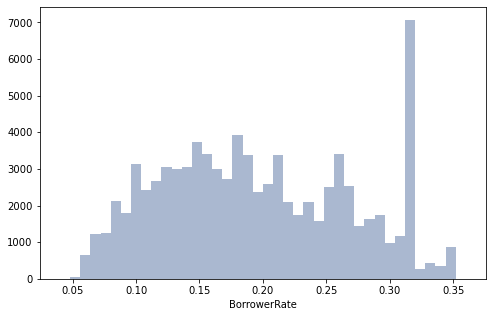

In [24]:
plt.figure(figsize=[8, 5])
plt.hist(data=loan_sub, x='BorrowerRate', bins=40, color=base_color);
plt.xlabel('BorrowerRate')
plt.show()

- The distribution has a mode around 0.32

## lets take a look at the status of all the loans

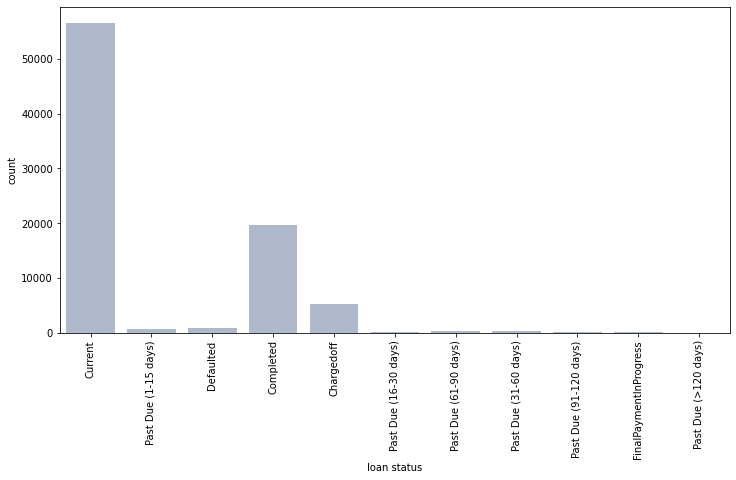

In [25]:
plt.figure(figsize=[12, 6])
sns.countplot(data = loan_sub, x = 'LoanStatus', color = base_color);

# Labeling the axes
plt.xlabel('loan status')
plt.ylabel('count')
plt.xticks(rotation=90)

# Dsiplay the plot
plt.show()

- Most of the loans are current loans while a lot are also completed loans

- Minority of the loans are past due also

## lets look at the monthly income distribution

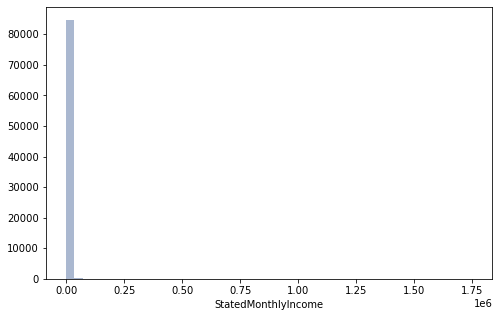

In [26]:
plt.figure(figsize=[8, 5])
plt.hist(data=loan_sub, x='StatedMonthlyIncome', bins=50, color=base_color);
plt.xlabel('StatedMonthlyIncome')
plt.show()

- There is something off about this distribution. let's take a closer look

In [27]:
loan_sub['StatedMonthlyIncome'].describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

- There are extreme outliers in this column so we will deal with them using a treshold.The treshold being anything more than two times the value of the standard deviation and mean.Therefore any value above the sum of the mean and twice the standard deviation should be dropped

In [28]:
mean=loan_sub['StatedMonthlyIncome'].std()
std=loan_sub['StatedMonthlyIncome'].mean()

#generating the treshold
treshold=mean+std*3

#getting the data below the treshold

loan_sub=loan_sub[loan_sub['StatedMonthlyIncome'] <=treshold]

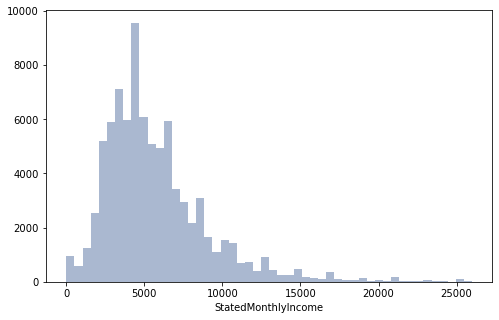

In [29]:
plt.figure(figsize=[8, 5])
plt.hist(data=loan_sub, x='StatedMonthlyIncome', bins=50, color=base_color);
plt.xlabel('StatedMonthlyIncome')
plt.show()

- the distribution is still slightly left skewed with a modal value of around 4000


## lets see the periods the loan are taken for

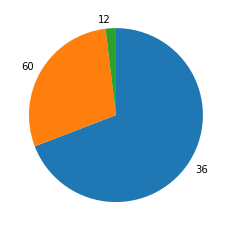

In [30]:
sorted_counts = loan_sub['Term'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);


- majority of the loans are taken for 36 months followed by 60 months

## looking at the employment status of the loan takers

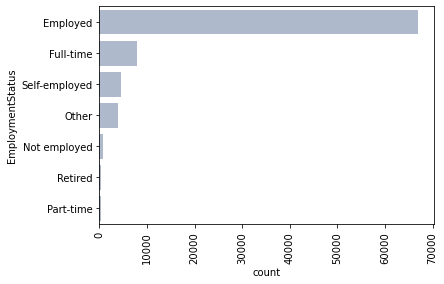

In [31]:
# Get the indexes of the Series

freq=loan_sub['EmploymentStatus'].value_counts()

gen_order = freq.index

#generating a plot
sns.countplot(data=loan_sub, y='EmploymentStatus', color=base_color,order=gen_order)
plt.xticks(rotation=90);

- most of the people who took the loan are employed 

## A look at the original loan amount distribution

C:\Users\qoyyum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


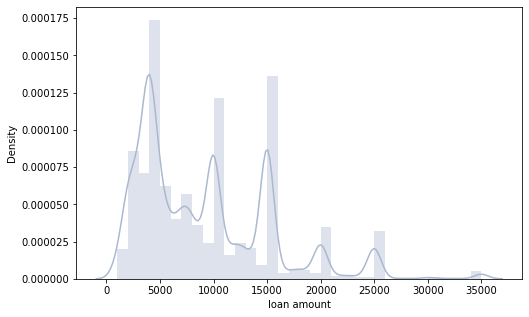

In [32]:
plt.figure(figsize=[8, 5])
bins = np.arange(1000, loan_sub['LoanOriginalAmount'].max()+200,1000)
sns.distplot(loan_sub['LoanOriginalAmount'], bins = bins,color=base_color)
plt.xlabel('loan amount')
plt.show()

- most of the loans are below 15,000 and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000

## looking at the total loans taken  

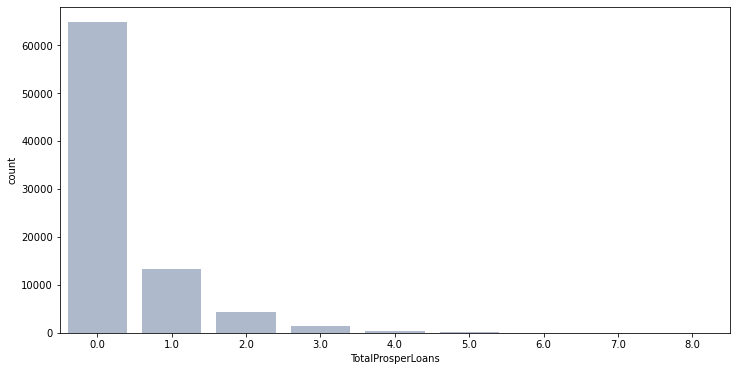

In [33]:
plt.figure(figsize=[12, 6])

#making the plot
sns.countplot(data = loan_sub, x = 'TotalProsperLoans', color = base_color);

# Labeling the axes
plt.xlabel('TotalProsperLoans')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

- most of the people that took the loans had no prior loans taken

## the distribution of the date the loans were taken

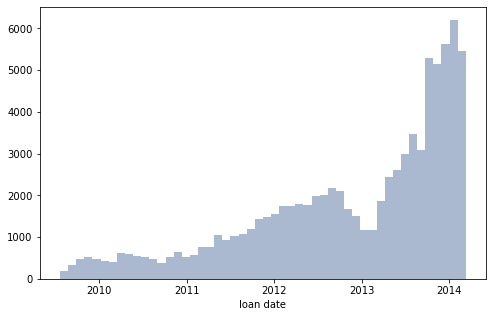

In [34]:
plt.figure(figsize=[8, 5])
plt.hist(data=loan_sub, x='LoanOriginationDate', bins=50, color=base_color);
plt.xlabel('loan date')
plt.show()

- the first loan date is a few months before the start of 2010

- We can clearly see a surge in the number of loans from the start of 2013

## taking a look at the purpose of the loans taken

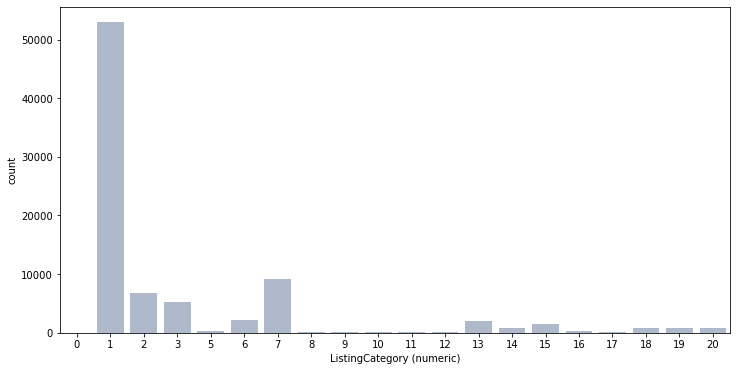

In [35]:
plt.figure(figsize=[12, 6])

#making the plot
sns.countplot(data = loan_sub, x = 'ListingCategory (numeric)', color = base_color);

# Labeling the axes
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

- the dictionary for the listing category are as follows: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business,
    4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure,
    11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental,
    16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
    
    
- A vast amount of the loans was taken for debt consolidation followed by other reasons,home improvement,business and so on

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is something off about the Distribution of monthly stated income and it contains a lot of outliers

> there is a surge in the loan date between 2013 and 2014

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> most loans are current loans but our main goal is to define driving factors of outcome of loan so we are not interested in any current loans. we will be dealing with this later on

> we will also handle the listing category values as most are very tiny in number and the column should be categorical

### replacing charrged off loans with defaulted since both of them technically werent paid back

In [36]:
loan_sub['LoanStatus'].replace(to_replace =["Chargedoff",],value ="Defaulted",inplace=True)

In [37]:
#checking the  value counts

loan_sub['LoanStatus'].value_counts()

Current                   56294
Completed                 19579
Defaulted                  6324
Past Due (1-15 days)        803
Past Due (31-60 days)       363
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      204
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [38]:
#filering to get only completed and defaulted loans

values=['Completed', 'Defaulted']

loan_sub=loan_sub[loan_sub['LoanStatus'].isin(values)]


In [39]:
#converting to a categorical data

values_list=['Completed', 'Defaulted']

status= pd.api.types.CategoricalDtype(ordered=True, categories=values_list)

loan_sub['LoanStatus']=loan_sub['LoanStatus'].astype(status)

In [40]:
loan_sub['LoanStatus'].value_counts()

Completed    19579
Defaulted     6324
Name: LoanStatus, dtype: int64

### let's deal with the ListingCategory (numeric) column

In [41]:
loan_sub['ListingCategory (numeric)'].value_counts()

1     12693
7      4750
2      2597
3      2348
6      1204
13      597
15      369
5       274
18      212
19      198
14      181
20      168
16       94
11       63
10       44
8        40
9        28
12       19
17       17
0         7
Name: ListingCategory (numeric), dtype: int64

we will convert the listing categories with infinitesimal counts to others 

In [42]:
#writting a function to convert the row values

def change_to_others(df):
    if df['ListingCategory (numeric)'] == 1:
        return 1
    elif df['ListingCategory (numeric)'] ==2:
        return 2
    elif df['ListingCategory (numeric)'] ==3:
        return 3
    elif df['ListingCategory (numeric)'] ==6:
        return 6
    else:
        return 7

In [43]:
#applying the function

loan_sub['ListingCategory (numeric)'] = loan_sub.apply(change_to_others, axis=1)

In [44]:
#mapping the numbers to strings 

categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def adjust_categories(df):
    category = df['ListingCategory (numeric)']
    if category in categories:
        return categories[category]

In [45]:
#applying the function

loan_sub['ListingCategory (numeric)'] = loan_sub.apply(adjust_categories, axis=1)

#converting to categorical data
catego_ry=['Debt Consolidation', 'Home Improvement', 'Business', 'Auto', 'Other']

classes = pd.api.types.CategoricalDtype(ordered=True, categories=catego_ry)

loan_sub['ListingCategory (numeric)']=loan_sub['ListingCategory (numeric)'].astype(classes)

In [46]:
#renaming the column

loan_sub.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

## Bivariate Exploration


### checking for correlation in the data

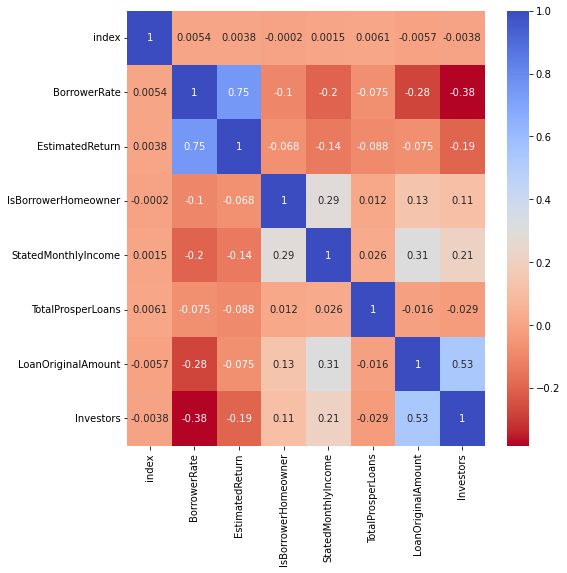

In [47]:
corr_matrix=loan_sub.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm_r')
plt.show()

- there is no strong correlation between most variables in the dataset. 


- There is some moderate positive correlation between `LoanOriginalAmount` and number of 
`Investors`, `LoanOriginalAmount` and `StatedMonthlyIncome`,

- There is a strong correlation between `estimated return` and `borrowers rate`. 


- There is also moderate negative correlation between loan amount and borrower rate and number of investors and borrower rate. 

### examining the relationship between prosper rating and borrower rate

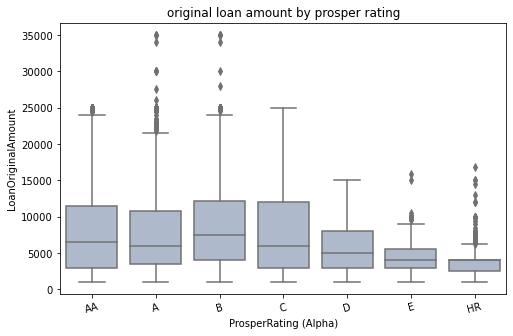

In [48]:
plt.figure(figsize = [8, 5])

sns.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);
plt.title("original loan amount by prosper rating");

- the original loan amount decreases as the  prosper rating decreases 

 ### examining the relationship between prosper rating, listing category and borrower rate

(0.024, 0.376)

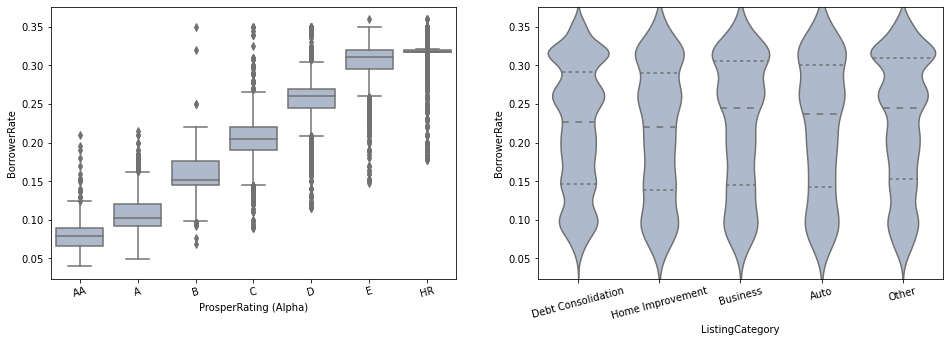

In [49]:
plt.figure(figsize = [16, 5])

# LEFT plot:
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot:
plt.subplot(1, 2, 2)
sns.violinplot(data=loan_sub,x= 'ListingCategory', y='BorrowerRate', color=base_color, inner='quartile')
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())

there are a lot of outliers but loans with high prosper rating have less borrower rate

borrower rate seems to have little vriation across listing category

### taking a look at the relationship between 'ListingCategory' and 'LoanOriginalAmount'

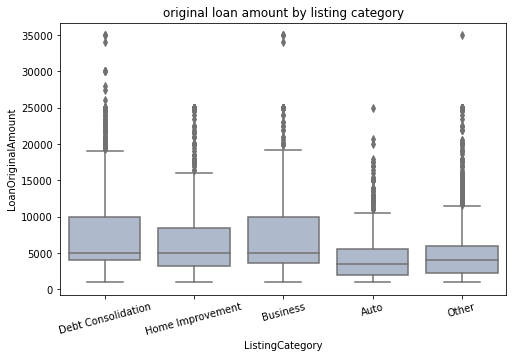

In [50]:
plt.figure(figsize = [8, 5])

sns.boxplot(data=loan_sub, x='ListingCategory', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);
plt.title("original loan amount by listing category");

- auto and other categories take less original loan amount

In [51]:
#create a function to map the booleans to yes or no
def convert_bool(df):
    if df['IsBorrowerHomeowner']== True:
        return 'Yes'
    else:
        return 'No'

In [52]:
#applying the function

loan_sub['IsBorrowerHomeowner']= loan_sub.apply(convert_bool,axis=1)
loan_sub['IsBorrowerHomeowner'].value_counts()

Yes    13185
No     12718
Name: IsBorrowerHomeowner, dtype: int64

In [53]:
#converting to a categorical data

catego_ries=['Yes', 'No']

owner = pd.api.types.CategoricalDtype(ordered=True, categories=catego_ries)

loan_sub['IsBorrowerHomeowner']=loan_sub['IsBorrowerHomeowner'].astype(owner)

### let's look at relationships between the following categorical features which are:

- 'Prosper Rating (Alpha)'  and 'loan status'

- 'Listing Category' and  'loan status'

- 'term' and 'Prosper Rating (Alpha)'

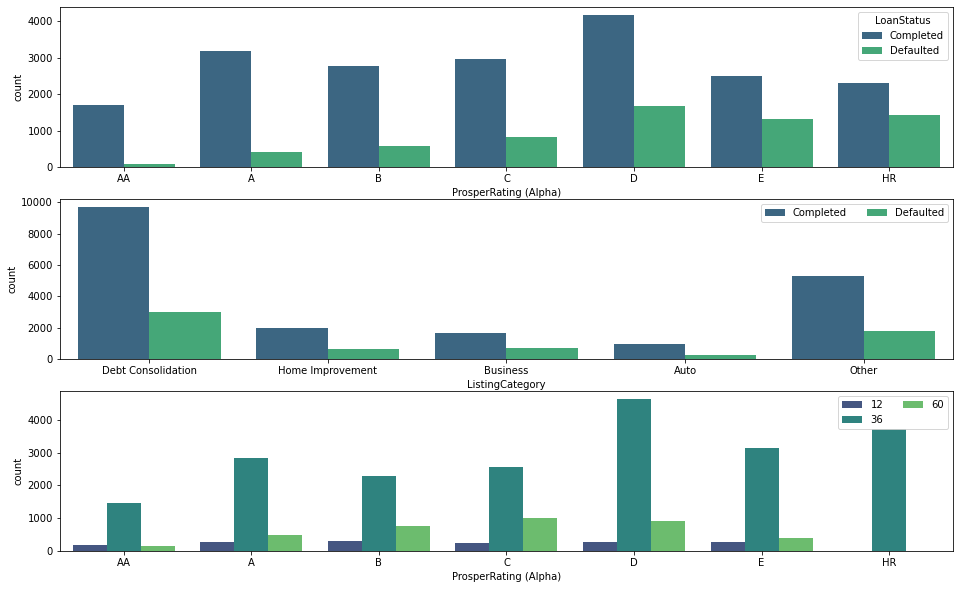

In [54]:
plt.figure(figsize = [16, 10])

# subplot 1: term vs homeowner
plt.subplot(3, 1, 1)
sns.countplot(data = loan_sub, x =  'ProsperRating (Alpha)', hue = 'LoanStatus', palette = "viridis")

# subplot 2: Term vs. loanstatus
ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan_sub, x='ListingCategory', hue='LoanStatus',  palette = "viridis")
ax.legend(ncol = 2)

# subplot 3: prosper rating vs. term
ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', hue = 'Term',  palette = "viridis")
ax.legend(loc = 1, ncol = 2) 

plt.show()

- as the loan rating decreases the number of defaulted loans increases

- That is actually interesting: The most common loan rating is `D`  and it is also the frequent rating among defaulted loans

- majority of the loans are taken for 36 months across all ratings. the `HR` rating loans are only taken for 36 months

### taking a look at the relationship between `ProsperRating (Alpha)` and `StatedMonthlyIncome`

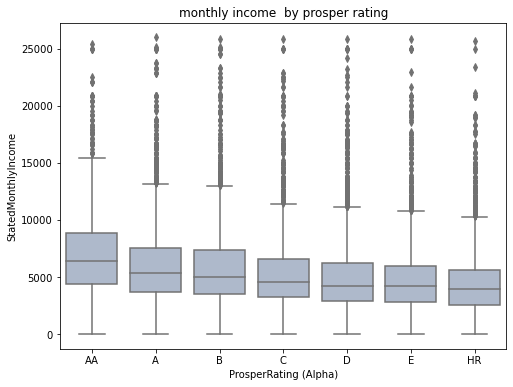

In [55]:
plt.figure(figsize = [8, 6])

sns.boxplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = base_color);

plt.title("monthly income  by prosper rating");

- individuals with higher monthly income tends to take loans with higher rating

### taking a look at the relationship between `ProsperRating (Alpha)` and `Investors`

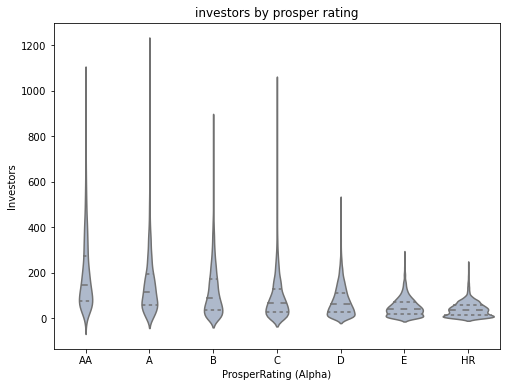

In [56]:
plt.figure(figsize = [8, 6])

sns.violinplot(data = loan_sub, x='ProsperRating (Alpha)', y='Investors', color = base_color,inner='quartile');

plt.title("investors by prosper rating");

- Borrowers with higher ratings on average have more investors

### taking a look at the relationship between `loan status` and `borrower rate`

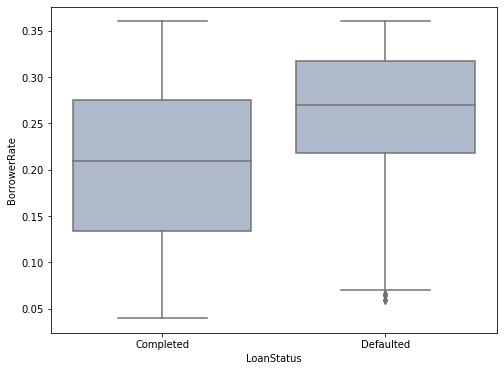

In [57]:
plt.figure(figsize = [8, 6])

sns.boxplot(data = loan_sub, x='LoanStatus', y='BorrowerRate', color = base_color);

- Borrower Rate for defaulted loans is considerably higher than for the completed 

### looking at the loans by year

In [58]:
#creating a year column
loan_sub['loan_year'] = pd.to_datetime(loan_sub["LoanOriginationDate"]).dt.to_period('Y')

# sorting data frame by loan year
loan_sub.sort_values("loan_year", axis = 0, ascending = True,
                 inplace = True)

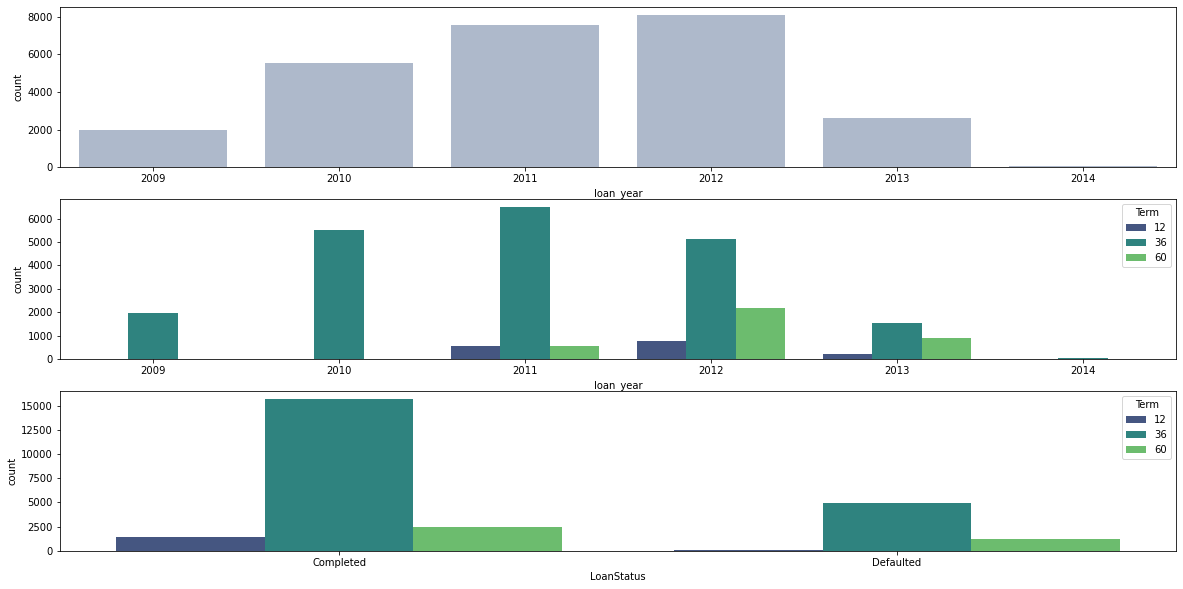

In [66]:
plt.figure(figsize = [20, 10])

# subplot 1:
plt.subplot(3, 1, 1)
sns.countplot(x = "loan_year", data = loan_sub,color=base_color);

# subplot 2:
ax = plt.subplot(3, 1, 2)
sns.countplot(x = "loan_year", data = loan_sub, hue='Term', palette = "viridis")

# subplot 2:
ax = plt.subplot(3, 1, 3)
sns.countplot(x = 'LoanStatus', data = loan_sub, hue='Term', palette = "viridis")

plt.show()

> The number of loans grew by year up until 2012 which there was a sharp decline in number of loans

> There were rarely any other type of loans except the 36 months term until 2012

> the 60 months Term credit have a high rate of defaults

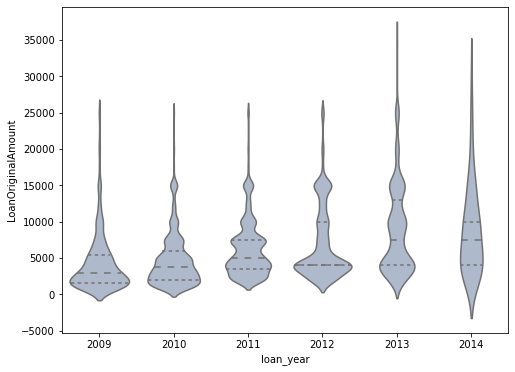

In [60]:
plt.figure(figsize = [8, 6])

sns.violinplot(data = loan_sub, x='loan_year', y='LoanOriginalAmount' ,color = base_color,inner='quartile');

- loan amount increased as the year went by

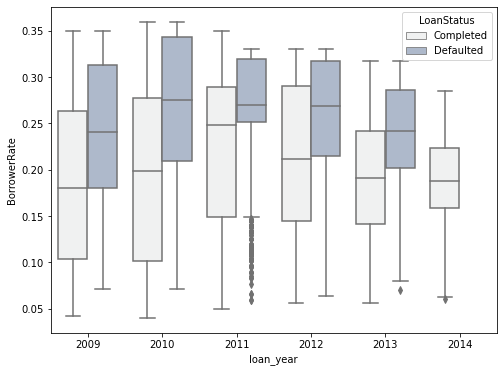

In [61]:
plt.figure(figsize = [8, 6])

sns.boxplot(data = loan_sub, x='loan_year', y='BorrowerRate', hue= 'LoanStatus' , color = base_color);

- the minimum borrower rate increased as the year goes by

- borrower rate starts reducing after 2011 from just above 0.30 to below 0.25

- the defaulted credits have a high borrower rate

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The borrower rate tends to be higher for defaulted credits

> more investors go for loans with higher prosper rating


> loans with low prosper rating have higher borrower rate


### Were there any interesting or surprising interactions between features?

 > The most frequent rating among defaulted loans is actually `D`
 
 > the `HR` rating loans are only taken for 36 months
 
 > the `A` rating home owners are almost three times the non home owners
 
 > only 36 months loan term was given in 2009
 
 > borrower rate starts reducing after 2011 

### Multivariate Exploration

### looking at borrower rate and estimated return by term

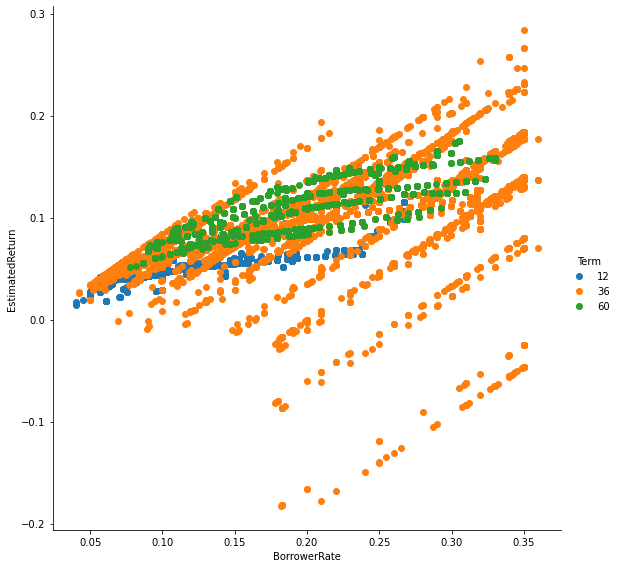

In [62]:
g = sns.FacetGrid(data = loan_sub, hue = 'Term', height = 8)
g.map(plt.scatter, 'BorrowerRate', 'EstimatedReturn');
g.add_legend()

- only the 36 months loan term has a negative estimated return 

### looking at loan status of each rating by estimated return

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='EstimatedReturn'>

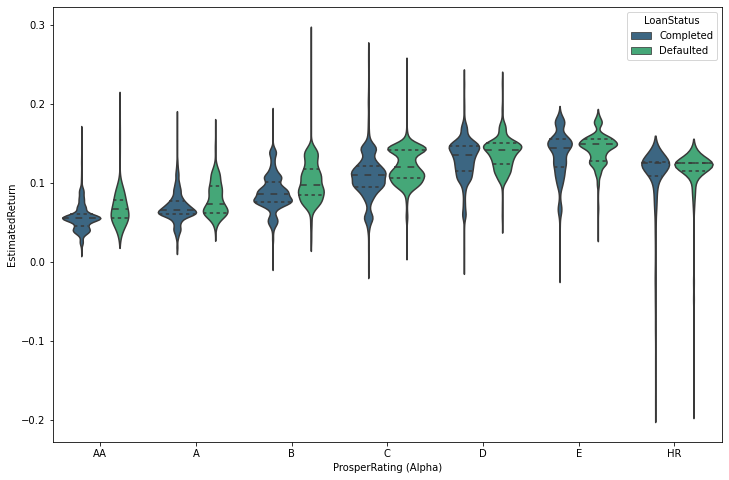

In [63]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=loan_sub, x='ProsperRating (Alpha)', y='EstimatedReturn', hue='LoanStatus', palette="viridis",inner='quartile')

- the estimated return increases as the rating decreases 

- the HR rating has a lot of negative estimated return

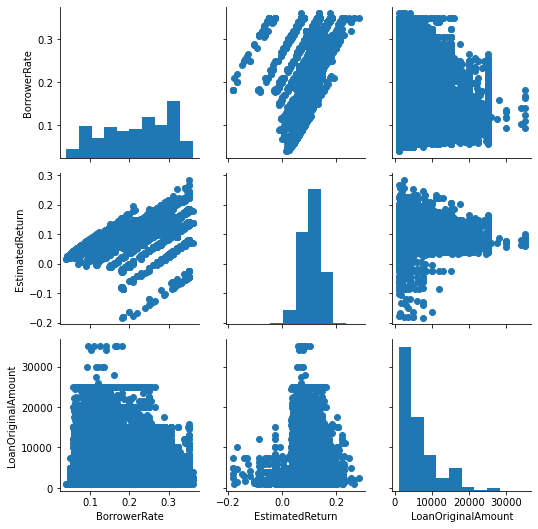

In [64]:
g = sns.PairGrid(data = loan_sub, vars = ['BorrowerRate','EstimatedReturn', 'LoanOriginalAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Estimated return.

- The credits with higher rating have a lesser chance of defaulting compared to the credits with lower ratings.

- Credits with high borrower rate are at higher risk of defaulting.

- Mid-term (32 months) loans are riskier than long -term and short term.

### Were there any interesting or surprising interactions between features?

 - An interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits.